# Simulated Annealing

Take a function with many local minima and try to find the global minimum.

https://www.science.org/doi/10.1126/science.220.4598.671

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(42)

In [2]:
def f(x):
    return(-(1+np.sin(3*x)) * (3. - 0.2*np.abs(x-2)  )  )

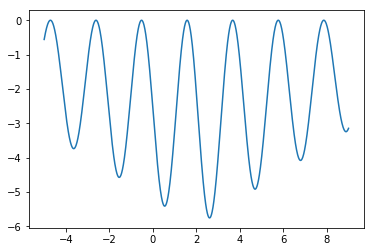

In [3]:
xrange = np.arange(-5,9,0.01)
plt.plot(xrange, f(xrange))
plt.show()

In [4]:
x_0 = np.random.choice(xrange)
print(x_0)

6.25999999999976


In [5]:
def select_neighbour(x_0, step = 1.):
    Lower = max(x_0-step,
                   np.min(xrange))
    Upper = min(x_0+step, 
                   np.max(xrange))
    return(np.random.choice(np.arange(Lower,Upper,step/500)))


In [6]:
def Goodness(xold, xnew, Temperature, F):
    #print( F(xold), F(xnew))
    return( np.exp(- (F(xnew)-F(xold))/Temperature )) # always >1, if F(xnew)<F(xold)

In [7]:
Goodness(5.5, 2.5, 1, f)

142.21019649327422

In [8]:
def SimulatedAnnealing(Tlist, x_start, F, stepsize = 1.):
    # takes a list of decreasing temperatures and a starting value xstart to minimise F
    
    xarr = np.empty(len(Tlist))
    x = x_start # starting point
    for i in np.arange(len(Tlist)):
        y = select_neighbour(x, step = stepsize)
        Score = Goodness(x, y, Tlist[i], F)
        r = np.random.random(1)
        
        if (Score > r): # always fulfilled, if F(xnew)<F(xold) (because then Goodness>1)
            x = y
        xarr[i] = x
    return(xarr)

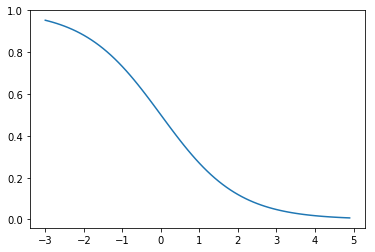

In [9]:
def sigmoid(x):
    return(np.exp(-x)/(1+np.exp(-x)))
Range = np.arange(-3,5,0.1)
plt.plot(Range, 
        sigmoid(Range))
plt.show()

In [10]:
T0 = 100
Tlist = T0*sigmoid(np.linspace(-3,10,1000))
print(len(Tlist))

1000


2.5879999999998096


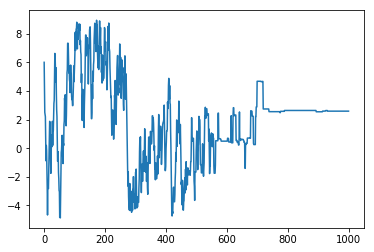

In [11]:
SA = SimulatedAnnealing(Tlist, x_0, f, stepsize = 2)
print(SA[-1])
plt.plot(SA)


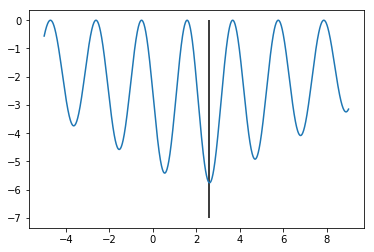

In [12]:
plt.plot(xrange, f(xrange))
plt.vlines(SA[-1], ymin = -7, ymax = 0)
plt.show()

### Consistency Check
For different initial conditions

In [13]:
Minima = np.empty(100)
for i in range(len(Minima)):
    x_0 = np.random.choice(xrange)
    Minima[i] = SimulatedAnnealing(Tlist, x_0, f, stepsize = 2)[-1]


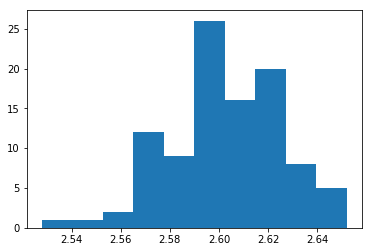

In [14]:
plt.hist(Minima)
plt.show()

The algorithm always ends up in the local neighbourhood of the true global minimum!

## Second Example: Pixel Map
Consider a 2d grid with binary values 1 and 0. Same values have an attractive force (i.e. low potential) for short distances and a repulsive for long-range distances. What happens for different cooling processes (i.e. fast and slow cooling) in the annealing, if we wish to minimise the potential?

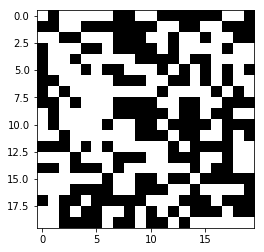

In [15]:
dim = 20
Data = np.random.random_sample((dim,dim))
Data = 1.0*(Data>np.mean(Data)) # binary random data
plt.imshow(Data,cmap=cm.Greys_r)
plt.show()

In [16]:
Data.flatten()

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1.

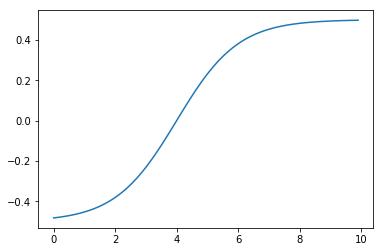

In [17]:
def AttractRepulse(Dist):
    return(  -0.5 + sigmoid(-Dist+4) )
plt.plot(np.arange(0,10,0.1), AttractRepulse(np.arange(0,10,0.1)))
plt.show()


In [18]:
def TwoParticlePotentialOld(x,y, Data):
# takes the indices x = (i,j) and y = (l,k) of two points
    distance = sum((np.array(x)-np.array(y))**2.) # Euclidean Distance
    return( (1-(Data[x]!=Data[y]))*  AttractRepulse(distance))    

In [19]:
# Very simple potential

def TwoParticlePotential(x,y, Data):
# takes the indices x = (i,j) and y = (l,k) of two points
    distance = sum((np.array(x)-np.array(y))**2.) # Euclidean Distance
    if distance < 5:
        value = -1
    else:
        value = 1
    return( (1-(Data[x]!=Data[y]))*  value)    

In [20]:
x = (2,2)
y = (5,3)
print(Data[x], Data[y])
print(np.array(x)-np.array(y))
print(TwoParticlePotential(x,y,Data))

0.0 1.0
[-3 -1]
0


In [21]:
def FullPotential(Data):
    Potential = 0
    
    for i in range(Data.shape[0]):
        for j in range(Data.shape[1]):
            for l in range(Data.shape[0]):
                for k in range(Data.shape[1]):
                    if (i,j) != (l,k):
                        Potential += TwoParticlePotential((i,j),(k,l),Data)
    return(Potential)

In [22]:
FP = FullPotential(Data)
print(FP)

74644


In [23]:
def ChangePixel(Dat):
    # swaps two pixels on the 2d map "Data"
    i,k = np.random.choice(np.arange(0, Dat.shape[0]),2)
    j,l = np.random.choice(np.arange(0, Dat.shape[0]),2)
    
    while Dat[i,j]==Dat[k,l]: # make sure that two different pixels are swapped
        i,k = np.random.choice(np.arange(0, Dat.shape[0]),2)
        j,l = np.random.choice(np.arange(1, Dat.shape[0]),2)
        
    Data2 = np.copy(Dat)
    Data2[i,j] = np.copy(Dat[k,l])
    Data2[k,l] = np.copy(Dat[i,j])
    return(Data2)

In [24]:
def ChangePixels(Dat, p):
    # swap 2*p Pixels on the 2d Map "Data"
    Data2 = np.copy(Dat)
    for n in range(p):
        i,k = np.random.choice(np.arange(0, Dat.shape[0]),2)
        j,l = np.random.choice(np.arange(0, Dat.shape[0]),2)
    
        while Dat[i,j]==Dat[k,l]: # make sure that two different pixels are swapped
            i,k = np.random.choice(np.arange(0, Dat.shape[0]),2)
            j,l = np.random.choice(np.arange(1, Dat.shape[0]),2)
        
        Data2[i,j] = np.copy(Dat[k,l])
        Data2[k,l] = np.copy(Dat[i,j])
    
    return(Data2)

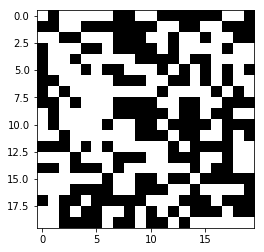

In [25]:
plt.imshow(Data,cmap=cm.Greys_r)
plt.show()

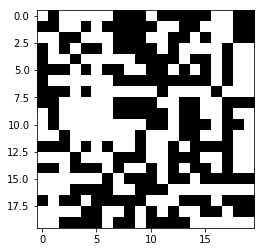

In [26]:
plt.imshow(ChangePixels(Data,20),cmap=cm.Greys_r)
plt.show()

In [27]:
Data0 = np.copy(Data)

In [28]:
def SimulatedAnnealingMap(Tlist, x_start, F, stepsize =1 ):
    # takes a list of decreasing temperatures and a starting map x_start to minimise F
    # stepsize is the number of changed pixels per iteration
    
    print(len(Tlist))
    x = x_start # starting point
    for t in np.arange(len(Tlist)):
        y = ChangePixels(x,stepsize)
        Score = Goodness(x, y, Tlist[t], F)
        r = np.random.random(1)
        
        if (Score > r): # always fulfilled, if F(xnew)<F(xold) (because then Goodness>1)
            x = y
    return(x)

In [29]:
index = np.arange(0,100,10)

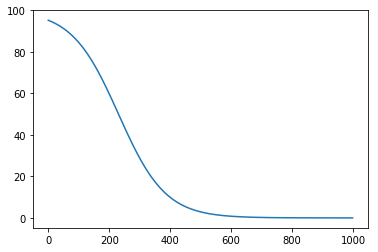

In [30]:
Tlist_short =  T0*sigmoid(np.linspace(-3,10,1000))
plt.plot(Tlist_short)

In [31]:
SAM = SimulatedAnnealingMap(Tlist_short, Data, FullPotential,stepsize=10)

1000


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


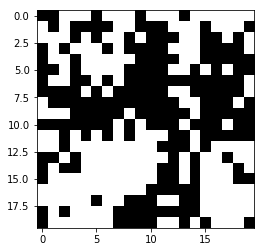

In [32]:
plt.imshow(SAM,cmap=cm.Greys_r)
plt.show()

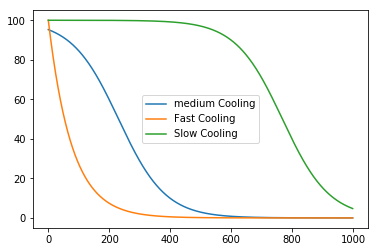

In [33]:
# Now for different cooling speed
Tlist_short2 =  T0*np.exp(-3-np.linspace(-3,10,1000))
Tlist_short3 = T0*sigmoid(np.linspace(-10,3,1000))

plt.plot(Tlist_short,label="medium Cooling")
plt.plot(Tlist_short2, label ="Fast Cooling")
plt.plot(Tlist_short3, label ="Slow Cooling")

plt.legend()
plt.show()

In [34]:
# Fast cooling
SAMfast = SimulatedAnnealingMap(Tlist_short2, Data, FullPotential,stepsize=100)

1000


In [35]:
# Slow cooling
SAMslow = SimulatedAnnealingMap(Tlist_short3, Data, FullPotential,stepsize=100)

1000


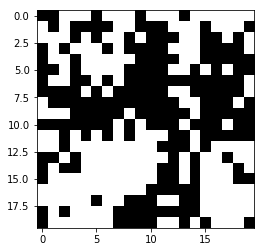

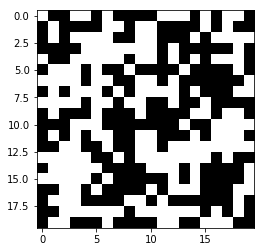

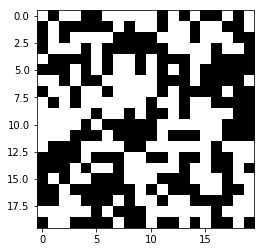

In [36]:
plt.imshow(SAM,cmap=cm.Greys_r)
plt.show()
plt.imshow(SAMfast,cmap=cm.Greys_r)
plt.show()
plt.imshow(SAMslow,cmap=cm.Greys_r)
plt.show()

Cannot really detect any qualitative differences between these "patterns". Maybe not enough iterations?